*Checking Data*

In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load data
with open("../data/processed/data.pkl", "rb") as f:
    model_data = pickle.load(f)

X = np.asarray(model_data['data'])
y = np.asarray(model_data['labels'])

print(f"Data dimuat: {X.shape[0]} sampel dengan {X.shape[1]} fitur.")

Data dimuat: 133290 sampel dengan 42 fitur.


In [3]:
# Menghitung nilai unik dan jumlahnya
unique, counts = np.unique(y, return_counts=True)
label_counts = dict(zip(unique, counts))

print("Jumlah data per label:")
for label, count in label_counts.items():
    print(f"Label {label}: {count} sampel")

Jumlah data per label:
Label A: 4122 sampel
Label B: 5261 sampel
Label C: 4488 sampel
Label D: 5708 sampel
Label E: 4982 sampel
Label F: 6788 sampel
Label G: 5730 sampel
Label H: 5372 sampel
Label I: 5384 sampel
Label J: 5476 sampel
Label K: 6280 sampel
Label L: 6058 sampel
Label M: 3477 sampel
Label N: 2758 sampel
Label O: 4899 sampel
Label P: 4581 sampel
Label Q: 4279 sampel
Label R: 5543 sampel
Label S: 5066 sampel
Label T: 4804 sampel
Label U: 5475 sampel
Label V: 5823 sampel
Label W: 5609 sampel
Label X: 4855 sampel
Label Y: 5170 sampel
Label Z: 5302 sampel


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4316\624525962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


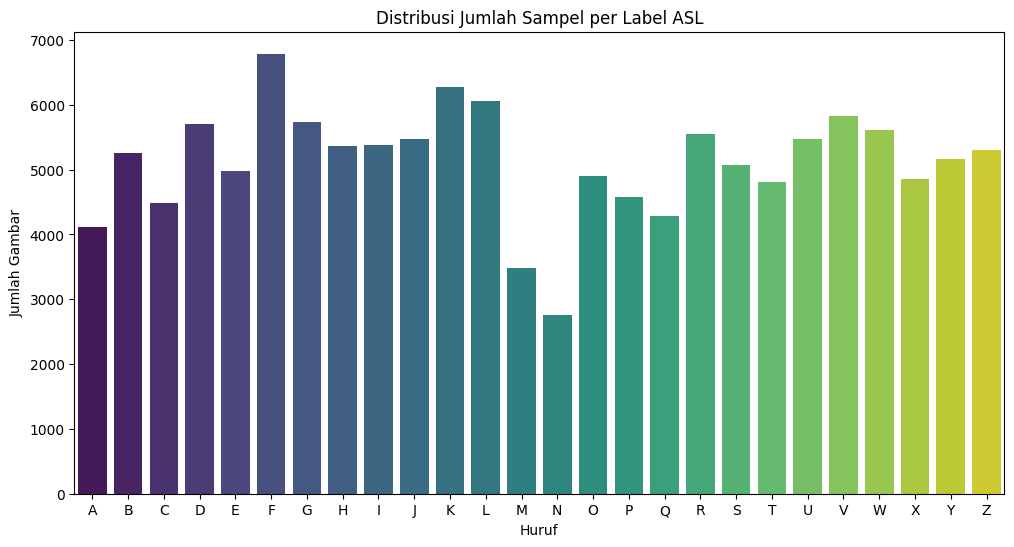

In [4]:
# Set ukuran grafik
plt.figure(figsize=(12, 6))

# Membuat bar plot
sns.countplot(x=y, palette='viridis')

plt.title('Distribusi Jumlah Sampel per Label ASL')
plt.xlabel('Huruf')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=0) # Agar huruf A-Z tegak lurus
plt.show()

*Pre-processing*

**balancing**

In [5]:
def auto_balance_dataset(X, y, target_count=6500):
    balanced_X = []
    balanced_y = []
    
    unique_labels = np.unique(y)
    
    for label in unique_labels:
        # Ambil semua index untuk label tertentu (misal label 'A')
        indices = np.where(y == label)[0]
        X_label = X[indices]
        y_label = y[indices]
        current_count = len(indices)
        
        print(f"Processing Label {label}: {current_count} -> {target_count}")
        
        if current_count > target_count:
            # Kasus: Terlalu banyak data (Undersampling)
            # Ambil sampel acak tanpa pengulangan
            idx_resampled = np.random.choice(current_count, target_count, replace=False)
            balanced_X.extend(X_label[idx_resampled])
            balanced_y.extend(y_label[idx_resampled])
            
        elif current_count < target_count:
            # Kasus: Terlalu sedikit data (Oversampling dengan Augmentasi)
            # 1. Masukkan semua data asli dulu
            balanced_X.extend(X_label)
            balanced_y.extend(y_label)
            
            # 2. Hitung berapa kekurangannya
            shortage = target_count - current_count
            
            # 3. Ambil data acak dari yang ada untuk di-augmentasi
            idx_to_augment = np.random.choice(current_count, shortage, replace=True)
            
            for idx in idx_to_augment:
                coords = X_label[idx].copy()
                # Tambahkan Jittering (Noise halus)
                # Skala 0.005 - 0.01 biasanya aman agar bentuk tangan tidak rusak
                noise = np.random.normal(0, 0.005, coords.shape)
                augmented_coords = coords + noise
                
                balanced_X.append(augmented_coords)
                balanced_y.append(label)
        else:
            # Pas 6500, masukkan saja semua
            balanced_X.extend(X_label)
            balanced_y.extend(y_label)
            
    return np.array(balanced_X), np.array(balanced_y)

# JALANKAN BALANCING
# Kita set target_count ke 6500 (angka tengah yang ideal buat datasetmu)
X_balanced, y_balanced = auto_balance_dataset(X, y, target_count=6500)

print(f"\nTotal data setelah balancing: {len(X_balanced)}")

Processing Label A: 4122 -> 6500
Processing Label B: 5261 -> 6500
Processing Label C: 4488 -> 6500
Processing Label D: 5708 -> 6500
Processing Label E: 4982 -> 6500
Processing Label F: 6788 -> 6500
Processing Label G: 5730 -> 6500
Processing Label H: 5372 -> 6500
Processing Label I: 5384 -> 6500
Processing Label J: 5476 -> 6500
Processing Label K: 6280 -> 6500
Processing Label L: 6058 -> 6500
Processing Label M: 3477 -> 6500
Processing Label N: 2758 -> 6500
Processing Label O: 4899 -> 6500
Processing Label P: 4581 -> 6500
Processing Label Q: 4279 -> 6500
Processing Label R: 5543 -> 6500
Processing Label S: 5066 -> 6500
Processing Label T: 4804 -> 6500
Processing Label U: 5475 -> 6500
Processing Label V: 5823 -> 6500
Processing Label W: 5609 -> 6500
Processing Label X: 4855 -> 6500
Processing Label Y: 5170 -> 6500
Processing Label Z: 5302 -> 6500

Total data setelah balancing: 169000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4316\989271014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, palette='magma')


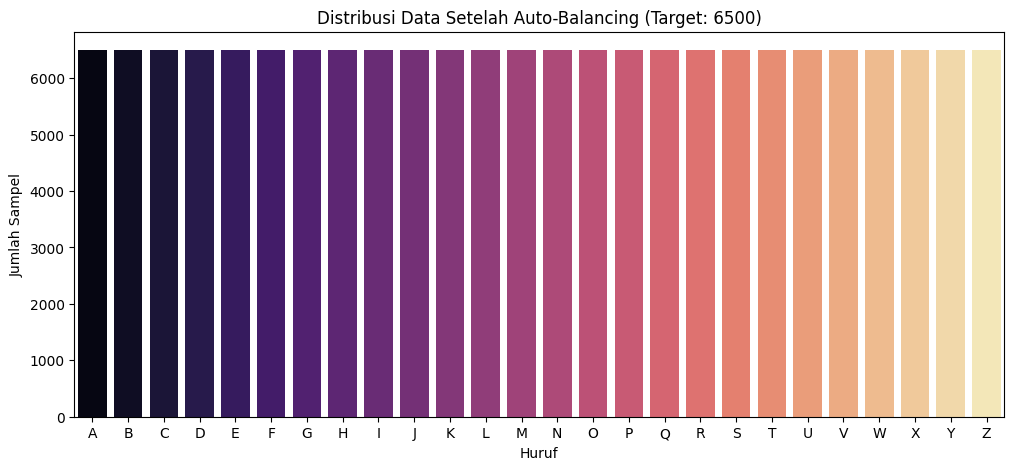

In [6]:
plt.figure(figsize=(12, 5))
sns.countplot(x=y_balanced, palette='magma')
plt.title('Distribusi Data Setelah Auto-Balancing (Target: 6500)')
plt.xlabel('Huruf')
plt.ylabel('Jumlah Sampel')
plt.show()

In [7]:
X = X_balanced
y = y_balanced

In [8]:
# Menampilkan 5 baris pertama dari data koordinat
print("Isi Array X (10 Sampel Pertama):")
print(X[:10]) 

# Cek dimensi array
print(f"\nShape X: {X.shape}") # Output: (Jumlah_Data, 42)

Isi Array X (10 Sampel Pertama):
[[0.4649094  0.70830953 0.55521971 0.66132337 0.61124432 0.55698943
  0.62857491 0.47477019 0.65787071 0.4190557  0.55937016 0.47874582
  0.58061469 0.42930478 0.56954646 0.49743918 0.55756181 0.55351663
  0.49723667 0.4801771  0.52075833 0.43875888 0.52148634 0.52338862
  0.52305681 0.59130204 0.439733   0.49043295 0.46784106 0.48920184
  0.48014259 0.57723236 0.48834842 0.63658595 0.38410705 0.50837219
  0.42047465 0.51795429 0.43846431 0.58287501 0.449238   0.62348121]
 [0.36027926 0.95274413 0.4477793  0.91456234 0.50862515 0.81938034
  0.53420907 0.74115199 0.56825936 0.6899358  0.47167289 0.75342202
  0.48112711 0.6837064  0.4626652  0.74129629 0.45270687 0.79365194
  0.41645929 0.75574702 0.42346948 0.68219161 0.41479349 0.76022851
  0.41629359 0.8237803  0.36336008 0.76808161 0.36984837 0.72394902
  0.37424353 0.80950999 0.38352165 0.86549538 0.31149405 0.78707808
  0.32567307 0.75158244 0.3355844  0.81599486 0.34611195 0.85883993]
 [0.5006175  

**normalization**

In [9]:
def normalize_hand_data(X):
    normalized_list = []
    
    for row in X:
        # 1. Ambil Wrist (Indeks 0 dan 1)
        wrist_x, wrist_y = row[0], row[1]
        
        # 2. Kurangi setiap titik dengan Wrist (Shifting)
        temp_row = []
        for i in range(0, len(row), 2):
            temp_row.append(row[i] - wrist_x)     # x_relatif
            temp_row.append(row[i+1] - wrist_y)   # y_relatif
            
        # 3. Scaling (Invariansi Jarak)
        # Cari nilai maksimum untuk normalisasi ukuran
        max_val = max(map(abs, temp_row))
        if max_val == 0: max_val = 1 # Cegah pembagian dengan nol
            
        final_row = [val / max_val for val in temp_row]
        normalized_list.append(final_row)
        
    return np.array(normalized_list)

# Terapkan ke data kamu
X_final = normalize_hand_data(X)

In [10]:
print("Isi Array X (10 Sampel Pertama):")
print(X_final[:10]) 

# Cek dimensi array
print(f"\nShape X: {X_final.shape}") # Output: (Jumlah_Data, 42)

Isi Array X (10 Sampel Pertama):
[[ 0.          0.          0.31221818 -0.16243921  0.50590485 -0.52313948
   0.56581966 -0.80738548  0.66710026 -1.          0.326567   -0.79364105
   0.40001296 -0.96456718  0.36174821 -0.72901491  0.32031524 -0.53514557
   0.11176089 -0.78869284  0.1930793  -0.93188274  0.19559616 -0.63930323
   0.20102552 -0.40451493 -0.08703914 -0.75323664  0.01013523 -0.75749278
   0.05266374 -0.45315621  0.0810327  -0.24796069 -0.27934756 -0.69121762
  -0.15361856 -0.65809065 -0.0914252  -0.4336486  -0.05417872 -0.29326601]
 [ 0.          0.          0.32341239 -0.14112521  0.54830718 -0.49293123
   0.64286895 -0.78207418  0.76872357 -0.97137638  0.41172646 -0.73672242
   0.44667059 -0.99440111  0.37843277 -0.78154082  0.3416254  -0.58802701
   0.20764926 -0.7281289   0.23355991 -1.          0.20149223 -0.71156467
   0.20703681 -0.47666837  0.01138712 -0.68253855  0.03536877 -0.84565878
   0.05161388 -0.52941342  0.08590711 -0.32248358 -0.18031697 -0.61232491
  -0

**flipping**

In [11]:
def flip_landmarks(X_data, y_data):
    flipped_X = []
    flipped_y = []
    
    for i in range(len(X_data)):
        # 1. Masukkan data asli
        flipped_X.append(X_data[i])
        flipped_y.append(y_data[i])
        
        # 2. Buat versi cermin (Flip X)
        # Ingat: X ada di indeks genap (0, 2, 4... 40)
        row_flipped = X_data[i].copy()
        for j in range(0, 42, 2):
            row_flipped[j] = -row_flipped[j] # Balikkan nilai X
            
        flipped_X.append(row_flipped)
        flipped_y.append(y_data[i]) # Label tetap sama
        
    return np.array(flipped_X), np.array(flipped_y)

# JALANKAN: Gunakan setelah Normalisasi
X_augmented, y_augmented = flip_landmarks(X_final, y)

print(f"Data Awal   : {len(X_final)}")
print(f"Data Setelah Flip : {len(X_augmented)}") # Jumlahnya jadi 2x lipat

Data Awal   : 169000
Data Setelah Flip : 338000


**KNN**

In [12]:
from sklearn.model_selection import train_test_split

# X_final adalah data yang sudah dinormalisasi
# y adalah label yang sudah seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X_augmented,  # Data yang sudah dinormalisasi
    y_augmented,        # Label yang sudah seimbang
    test_size=0.2,  # 20% data untuk testing
    shuffle=True,   # Acak data sebelum split
    stratify=y_augmented,     # Menjaga proporsi label di train dan test, contoh: kalo label 'A' 10% di total data, maka di train dan test juga 10%
    random_state=42 
)

print(f"Data Training: {X_train.shape[0]} sampel")
print(f"Data Testing : {X_test.shape[0]} sampel")

Data Training: 270400 sampel
Data Testing : 67600 sampel


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi Model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Proses Training
knn_model.fit(X_train, y_train)

# Prediksi data testing
y_predict = knn_model.predict(X_test)

# Hitung Akurasi
accuracy = accuracy_score(y_test, y_predict)
print(f"Akurasi Model KNN: {accuracy * 100:.2f}%")

Akurasi Model KNN: 99.35%



Classification Report:
              precision    recall  f1-score   support

           A       0.99      0.99      0.99      2600
           B       1.00      1.00      1.00      2600
           C       0.99      1.00      0.99      2600
           D       1.00      0.99      1.00      2600
           E       0.99      0.99      0.99      2600
           F       1.00      1.00      1.00      2600
           G       1.00      0.99      1.00      2600
           H       1.00      0.99      0.99      2600
           I       0.99      0.99      0.99      2600
           J       0.99      0.99      0.99      2600
           K       1.00      0.99      0.99      2600
           L       1.00      1.00      1.00      2600
           M       0.98      0.99      0.99      2600
           N       0.99      0.99      0.99      2600
           O       0.99      0.99      0.99      2600
           P       1.00      1.00      1.00      2600
           Q       0.99      0.99      0.99      2600
   

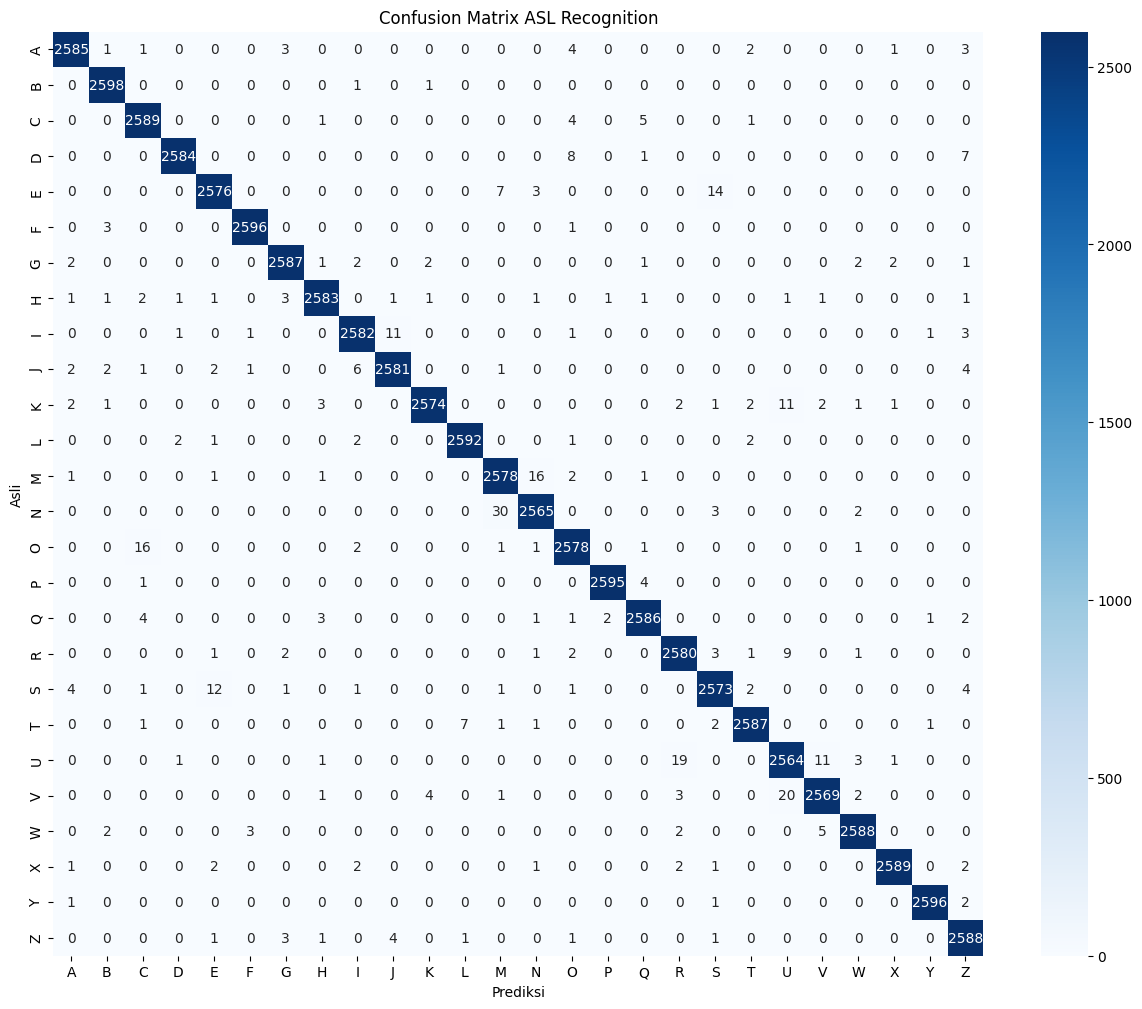

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Tampilkan Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_predict))

# Buat Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn_model.classes_, 
            yticklabels=knn_model.classes_)
plt.title('Confusion Matrix ASL Recognition')
plt.xlabel('Prediksi')
plt.ylabel('Asli')
plt.show()

In [ ]:
import pickle

model_export = {
    'model': knn_model,
    'classes': knn_model.classes_
}
#buat folder model dulu kalo belum ada
with open('../model/asl_knn_model.p', 'wb') as f:
    pickle.dump(model_export, f)

print("📁 Model berhasil disimpan sebagai 'asl_knn_model_03.p'")

📁 Model berhasil disimpan sebagai 'asl_knn_model_03.p'
